In [117]:
# import Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#0000FF', '#800070', '#FFFF00', '#005000'])

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score


from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings('ignore')




In [65]:
# load data
hr_attrition = pd.read_csv('HR-Employee-Attrition.csv')
hr_attrition


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### 1. Basic Exploration and Cleaning

In [66]:
hr_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [67]:
hr_attrition.shape

(1470, 35)

In [68]:
# Summary of Data Statistics
hr_attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [69]:
# Exploring data in HR dataframe
for column in hr_attrition.columns:
    print(f"{column}: Number of unique values {hr_attrition[column].nunique()}")
    print("|||||||||||||||||||")

Age: Number of unique values 43
|||||||||||||||||||
Attrition: Number of unique values 2
|||||||||||||||||||
BusinessTravel: Number of unique values 3
|||||||||||||||||||
DailyRate: Number of unique values 886
|||||||||||||||||||
Department: Number of unique values 3
|||||||||||||||||||
DistanceFromHome: Number of unique values 29
|||||||||||||||||||
Education: Number of unique values 5
|||||||||||||||||||
EducationField: Number of unique values 6
|||||||||||||||||||
EmployeeCount: Number of unique values 1
|||||||||||||||||||
EmployeeNumber: Number of unique values 1470
|||||||||||||||||||
EnvironmentSatisfaction: Number of unique values 4
|||||||||||||||||||
Gender: Number of unique values 2
|||||||||||||||||||
HourlyRate: Number of unique values 71
|||||||||||||||||||
JobInvolvement: Number of unique values 4
|||||||||||||||||||
JobLevel: Number of unique values 5
|||||||||||||||||||
JobRole: Number of unique values 9
|||||||||||||||||||
JobSatisfaction: Number of unique values 4
||

### Null Values and Duplicates

In [70]:
# Checking Missing Value
hr_attrition.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [71]:
# Checking for Duplicate Date
hr_attrition.duplicated().sum()

0

### Notes:
* No Null Value
* No Duplicate Data

In [72]:
hr_attrition.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [73]:
# Exploring data in HR dataframe
for column in hr_attrition.columns:
    print(f"{column}: Number of unique values {hr_attrition[column].nunique()}")
    print("|||||||||||||||||||")

Age: Number of unique values 43
|||||||||||||||||||
Attrition: Number of unique values 2
|||||||||||||||||||
BusinessTravel: Number of unique values 3
|||||||||||||||||||
DailyRate: Number of unique values 886
|||||||||||||||||||
Department: Number of unique values 3
|||||||||||||||||||
DistanceFromHome: Number of unique values 29
|||||||||||||||||||
Education: Number of unique values 5
|||||||||||||||||||
EducationField: Number of unique values 6
|||||||||||||||||||
EmployeeCount: Number of unique values 1
|||||||||||||||||||
EmployeeNumber: Number of unique values 1470
|||||||||||||||||||
EnvironmentSatisfaction: Number of unique values 4
|||||||||||||||||||
Gender: Number of unique values 2
|||||||||||||||||||
HourlyRate: Number of unique values 71
|||||||||||||||||||
JobInvolvement: Number of unique values 4
|||||||||||||||||||
JobLevel: Number of unique values 5
|||||||||||||||||||
JobRole: Number of unique values 9
|||||||||||||||||||
JobSatisfaction: Number of unique values 4
||

In [74]:
# eliminate unuseful features
hr_attrition.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [75]:
hr_attrition.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

In [76]:
# checking dataframe to check the effect of removal of unuseful features
hr_attrition.head() 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### Identifying Categorical and Discrete features

In [77]:
discrete_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField','EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus','OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']

### Unique Values

In [78]:
for n, feature in enumerate(hr_attrition.columns):
    if hr_attrition[feature].nunique() < 10:
        if hr_attrition[feature].nunique() == 1:
            hr_attrition.drop([feature], inplace=True, axis=1)
            continue
        
        print(f'{n}. {feature.upper()}')
        if hr_attrition[feature].dtype == object:
            print(hr_attrition[feature].unique())
        else:
            print("Numerical column - Skipping unique values.")
        print("|" * 35)
        print()


1. ATTRITION
Numerical column - Skipping unique values.
|||||||||||||||||||||||||||||||||||

2. BUSINESSTRAVEL
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
|||||||||||||||||||||||||||||||||||

4. DEPARTMENT
['Sales' 'Research & Development' 'Human Resources']
|||||||||||||||||||||||||||||||||||

6. EDUCATION
Numerical column - Skipping unique values.
|||||||||||||||||||||||||||||||||||

7. EDUCATIONFIELD
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
|||||||||||||||||||||||||||||||||||

8. ENVIRONMENTSATISFACTION
Numerical column - Skipping unique values.
|||||||||||||||||||||||||||||||||||

9. GENDER
['Female' 'Male']
|||||||||||||||||||||||||||||||||||

11. JOBINVOLVEMENT
Numerical column - Skipping unique values.
|||||||||||||||||||||||||||||||||||

12. JOBLEVEL
Numerical column - Skipping unique values.
|||||||||||||||||||||||||||||||||||

13. JOBROLE
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Directo

### 2. Exploratory Data Analysis
    2.1 Target Label Distribution

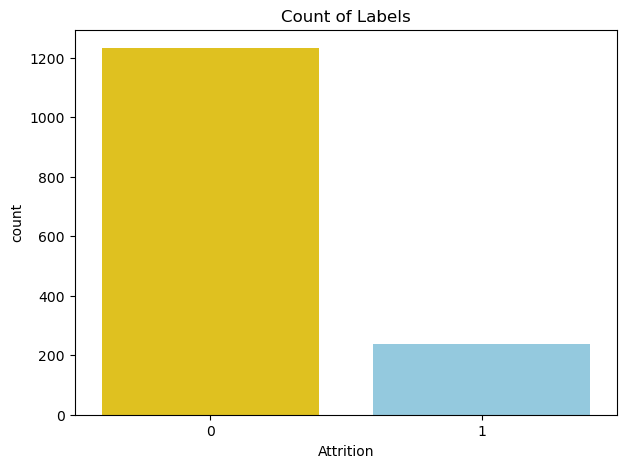

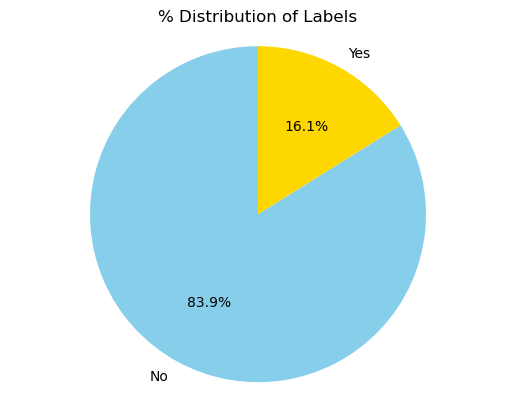

In [79]:
labels = ['Yes' if i==1 else 'No' for i in hr_attrition['Attrition'].value_counts().index]
plt.figure(figsize=(7,5))
sns.countplot(x='Attrition',data=hr_attrition,palette=['#FFD700','#87CEEB'])
plt.title("Count of Labels")
plt.show()
label_counts = [round(i/len(hr_attrition)*100,2) for i in hr_attrition['Attrition'].value_counts()]
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'gold'])
plt.title('% Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



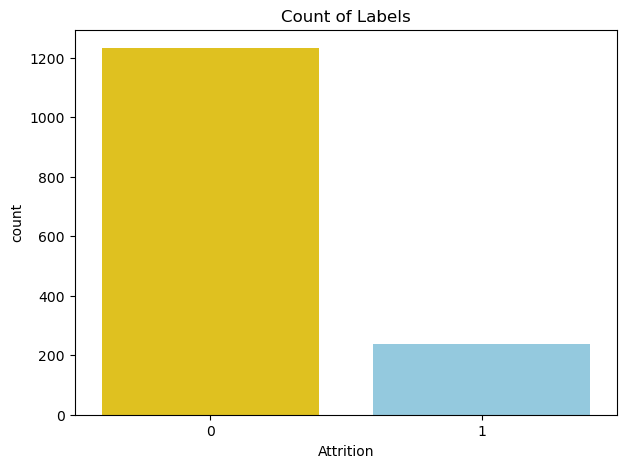

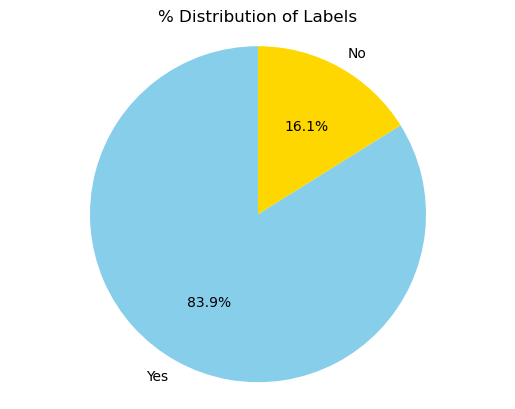

In [80]:
labels = ['Yes' if i==1 else 'No' for i in hr_attrition['Attrition']]
plt.figure(figsize=(7, 5))
sns.countplot(x='Attrition', data=hr_attrition, palette=['#FFD700', '#87CEEB'])
plt.title("Count of Labels")
plt.show()

# Pie chart
label_counts = hr_attrition['Attrition'].value_counts(normalize=True) * 100
labels = ['Yes', 'No']

plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'gold'])
plt.title('% Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Observation:
* Dataset is highly imbalanced. More than 80% of data belongs to employee who say No to Attrition while only 16% of employee atcually say Yes to attrition


### 2.2 Feature Distribution

In [81]:
def plot_distribution(feature, bins=None):
    corr = hr_attrition['Attrition'].corr(hr_attrition[feature])
    corr = np.round(corr, 3)
    
    plt.figure(figsize=(8, 6))
    colors = ['#FF6347', '#00FF7F']
    if bins is None:
        sns.histplot(x=feature, data=hr_attrition, hue='Attrition', kde=True, palette=colors)
    else:
        sns.histplot(x=feature, data=hr_attrition, hue='Attrition', kde=True, palette=colors, bins=bins)

    plt.title(f'{feature} (Correlation with Attrition: {corr})')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

def plot_countplot_with_percentage(var_select, ctg=False):
    # Convert integer labels to string labels
    hr_attrition['Attrition'] = hr_attrition['Attrition'].astype(str)

    tmp = pd.crosstab(hr_attrition[var_select], hr_attrition['Attrition'])
    tmp['Attr%'] = tmp['1'] / (tmp['0'] + tmp['1']) * 100
    if ctg:
        tmp = tmp.sort_values('1', ascending=False)

    color_palette = ['skyblue', 'salmon']
    sns.set_palette(color_palette)

    plt.figure(figsize=(12, 6))

    ax = sns.countplot(x=var_select, hue='Attrition', data=hr_attrition)
    ax.set_title(str(var_select))
    ax.set_ylabel('Count')
    if ctg:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Plot the line plot using adjusted x-coordinates
    ax2 = ax.twinx()
    line_x = np.arange(len(tmp))
    ax2.plot(line_x, tmp['Attr%'], marker='o', color='black', label='% Attrition')
    ax2.set_ylabel('% Attrition')

    step_size = 10
    max_value = tmp['Attr%'].max() + step_size
    ax2.set_ylim(0, max_value)
    y_ticks = np.arange(0, max_value, step_size)
    ax2.set_yticks(y_ticks)

    # Legend for the countplot
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, ['0', '1'], loc='upper right')
    ax2.legend(loc='upper left')  # Legend for the line plot

    plt.show()


### Daily Rate/ MonthlyRate/HourlyRate

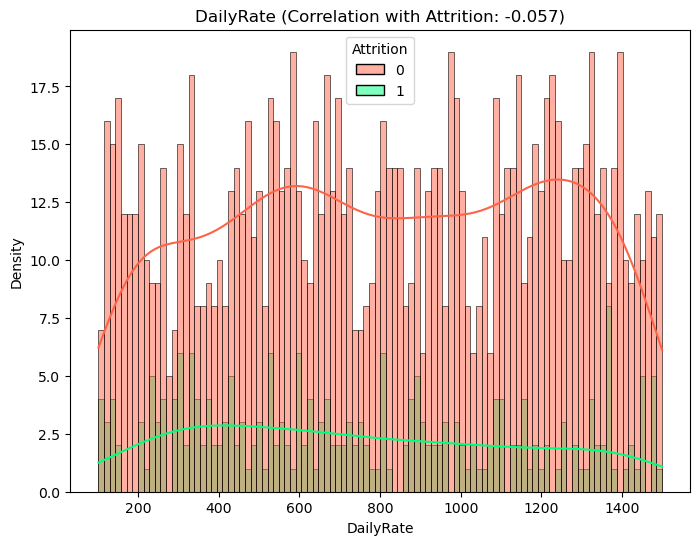

In [82]:
plot_distribution('DailyRate',100)

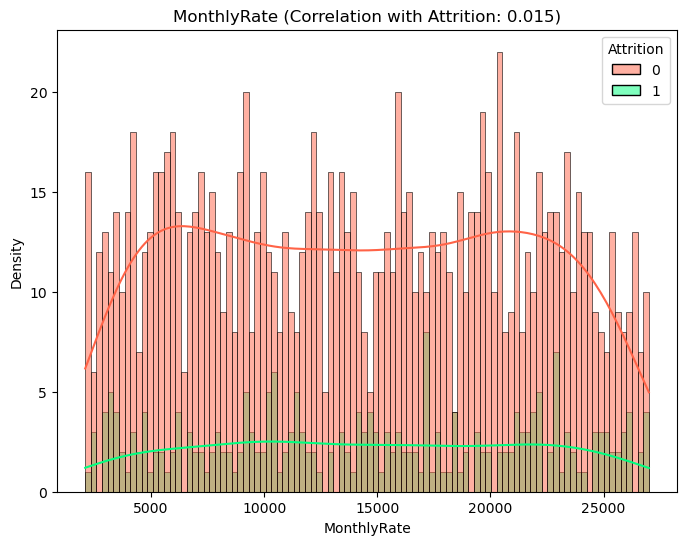

In [83]:
plot_distribution('MonthlyRate',100)

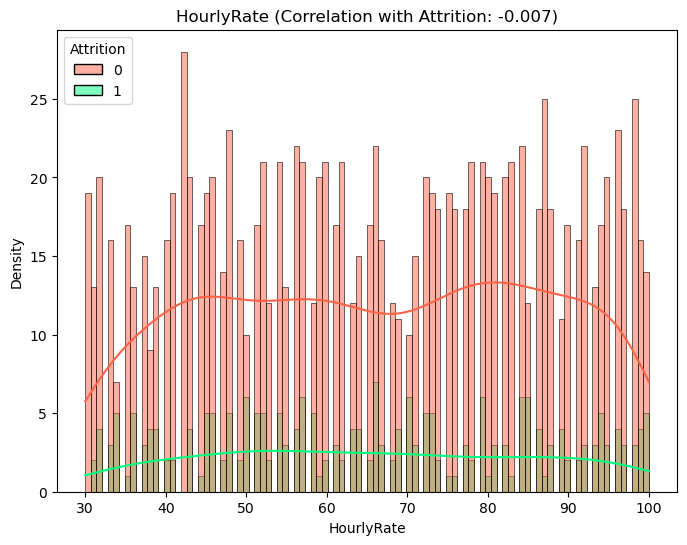

In [84]:
plot_distribution('HourlyRate',100)

### Observation:
* We can observe that Daily Rate/MonthlyRate/HourlyRate are bimodally distributed for all rates
* Clearly the spread of data is high

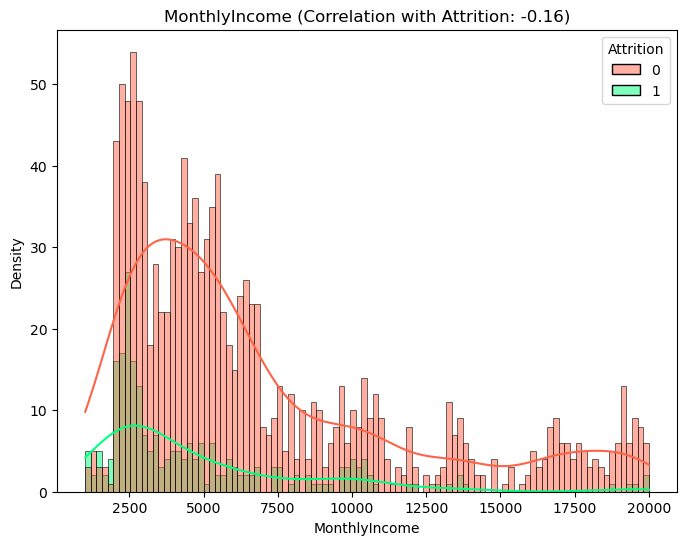

In [85]:
plot_distribution('MonthlyIncome',100)

### Observation:
- We can observe that Monthly Rate has normally distributed but it is skewed towards left
- Most of the employees have monthly income in the range of 2000-6000 dollars
- Clearly there some employees who have high income and attrition rate among them is low¶

### 2.2.2 Age

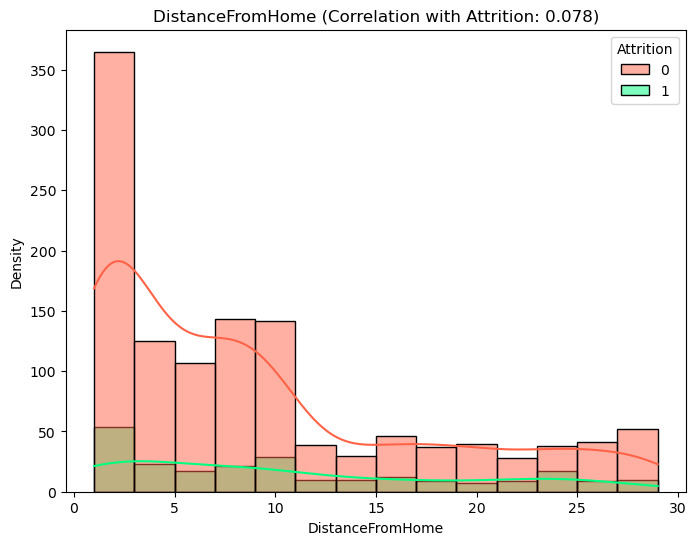

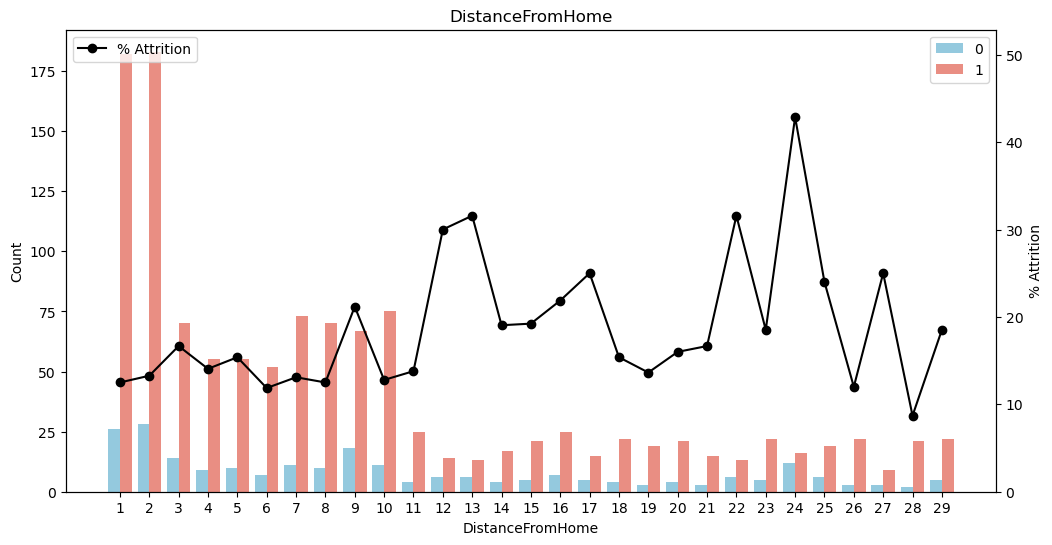

In [86]:
plot_distribution('DistanceFromHome')
plot_countplot_with_percentage('DistanceFromHome') 

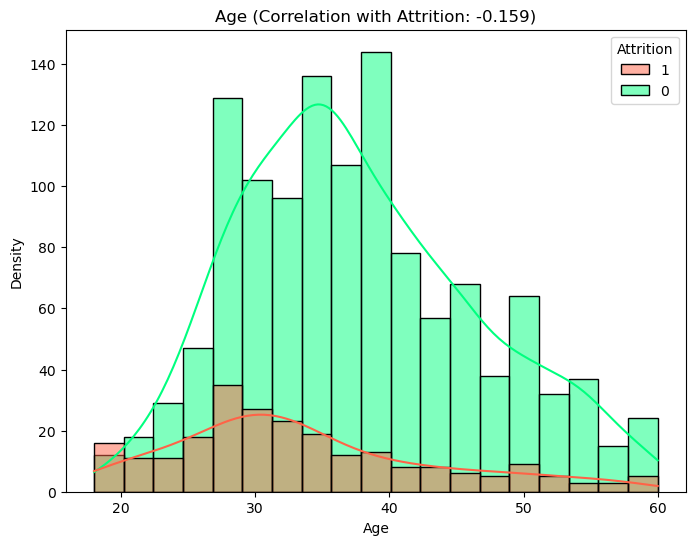

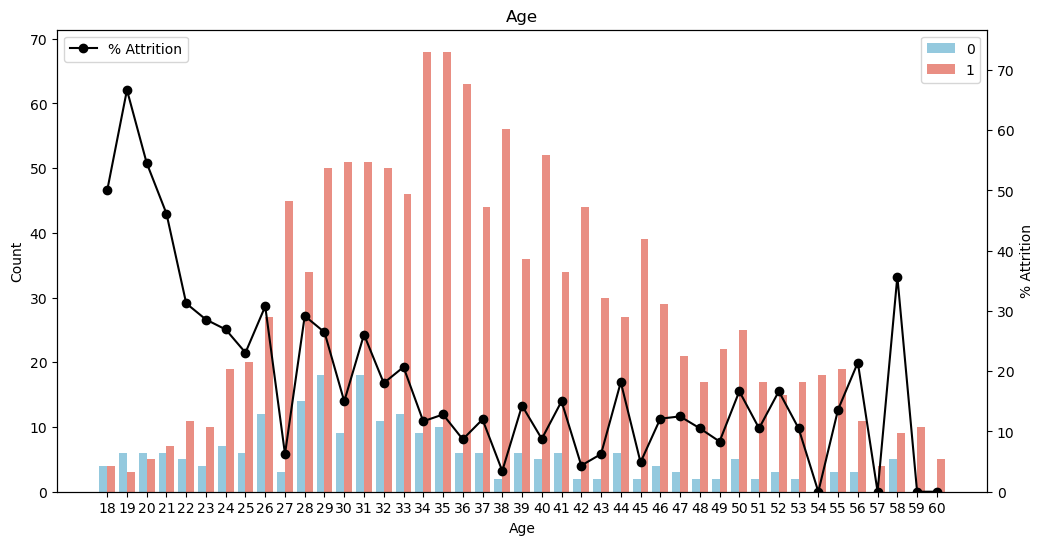

In [87]:
plot_distribution('Age')
plot_countplot_with_percentage('Age')

### Observation:¶
- We can observe that Age is normally distributed with a mean around 35.
- Generally, employees who are younger tend to leave the company more than older ones
- This might be because in early part of of carrier switching comapnies benefit employees and as they grow older they look for stability

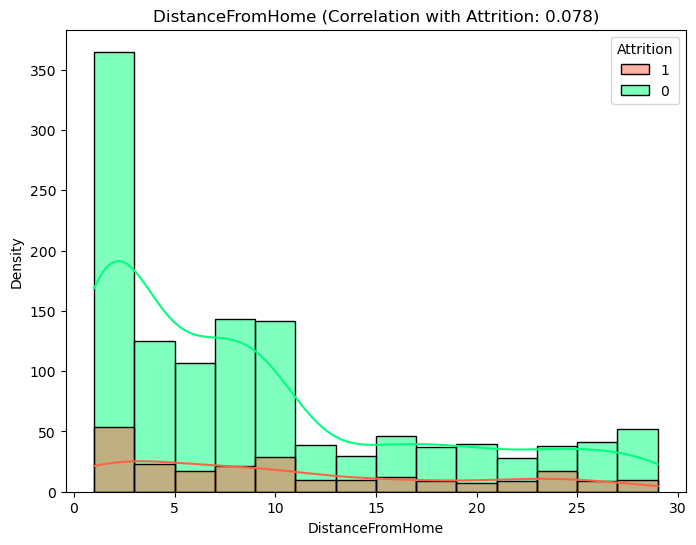

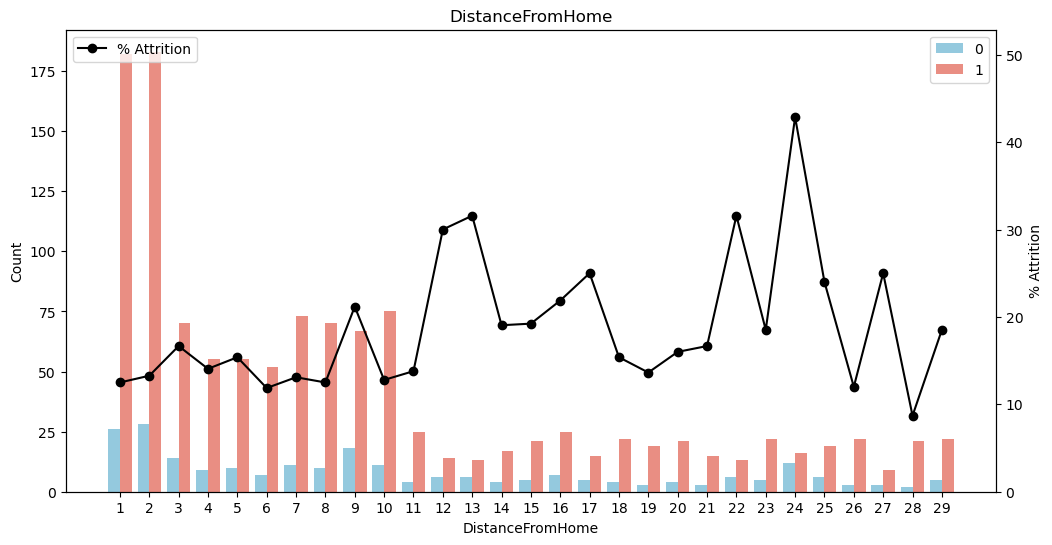

In [88]:
plot_distribution('DistanceFromHome')
plot_countplot_with_percentage('DistanceFromHome')

### Observation:¶
- We can see that majority of employees live closer to the company
- Also, attrition rate high among employees who are farther away from home. Although its not a general trend

### NumCompaniesWorked

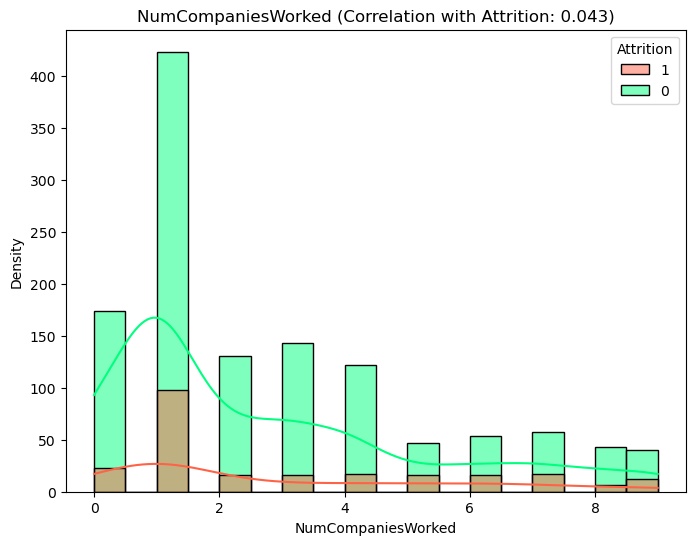

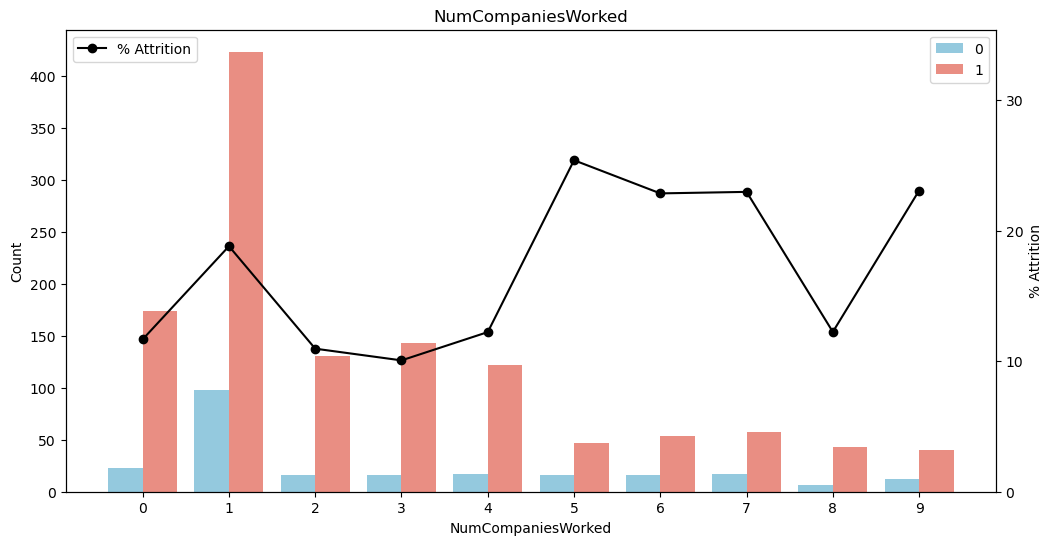

In [89]:
plot_distribution('NumCompaniesWorked')
plot_countplot_with_percentage('NumCompaniesWorked')

### Observation:¶
- It is interesting to observe that majority of employees have worked only in one company prior to IBM
- Moreover, people who have worked in more than 4 companies prior to IBM are more prone to leave the company

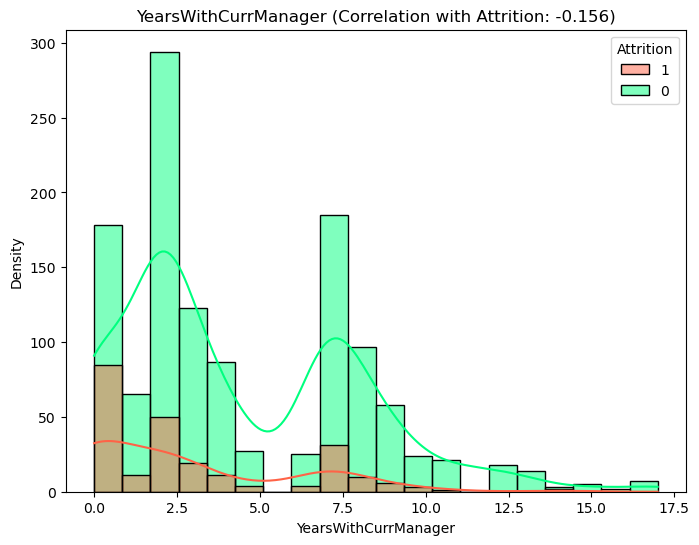

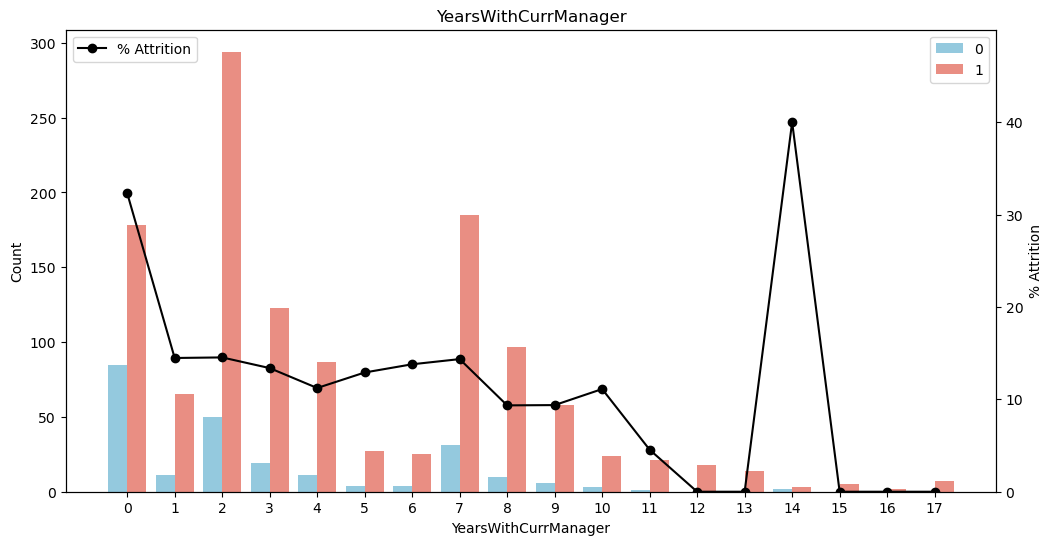

In [90]:
plot_distribution('YearsWithCurrManager')
plot_countplot_with_percentage('YearsWithCurrManager')

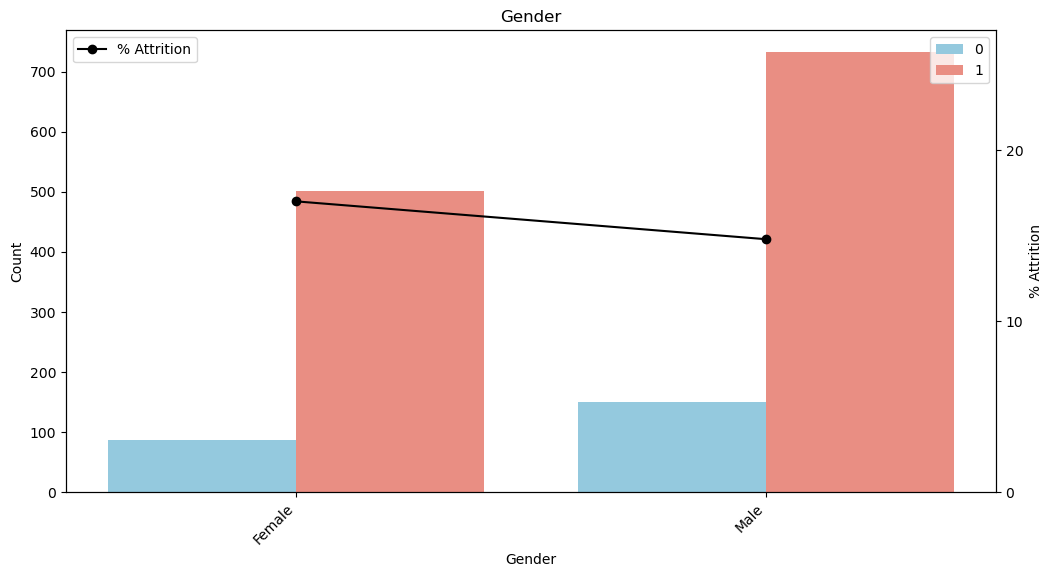

In [91]:
plot_countplot_with_percentage('Gender',True)

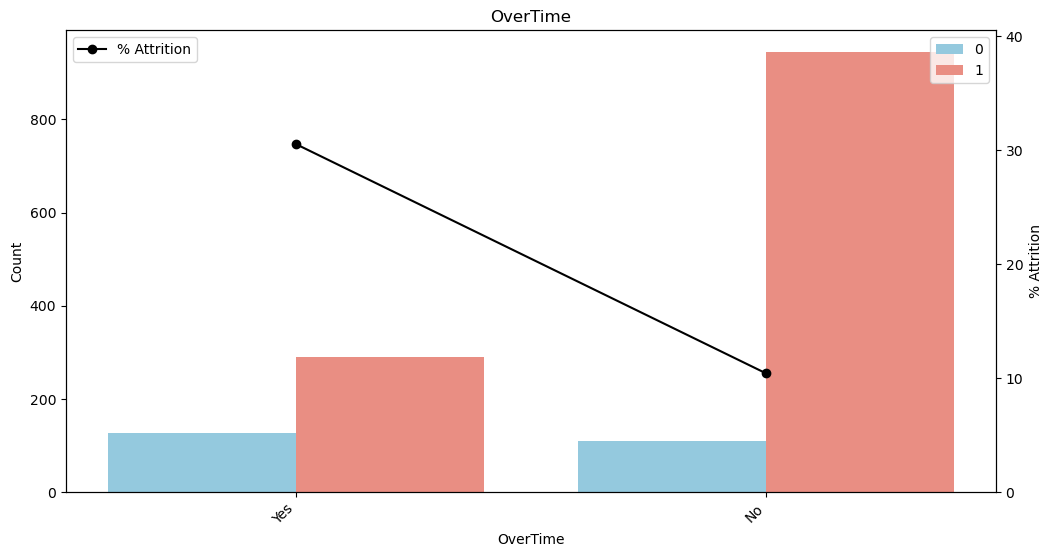

In [92]:
plot_countplot_with_percentage('OverTime',True)

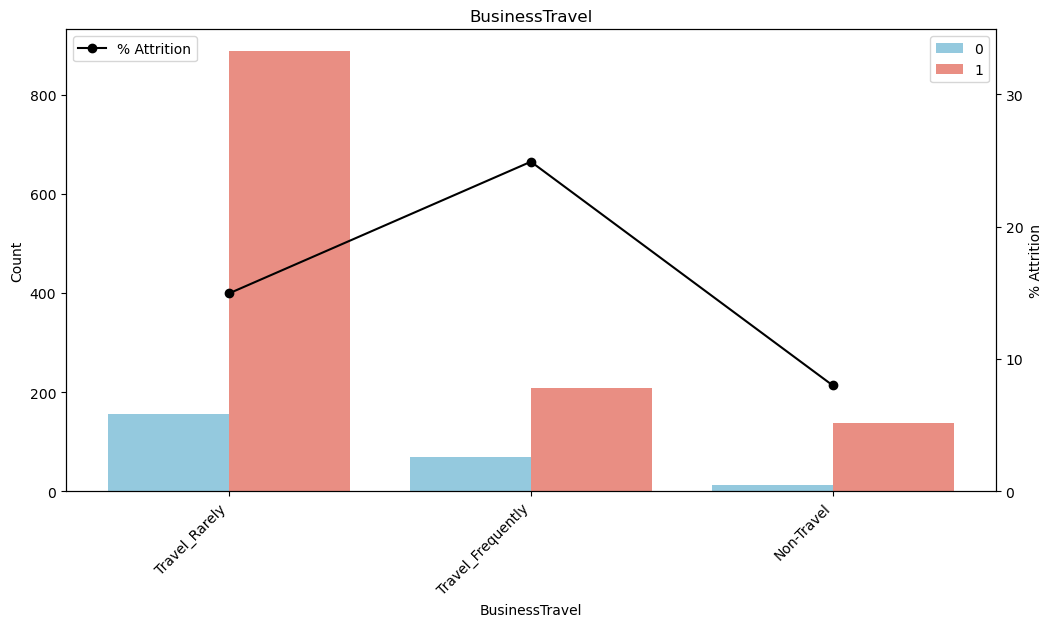

In [93]:
plot_countplot_with_percentage('BusinessTravel',True)

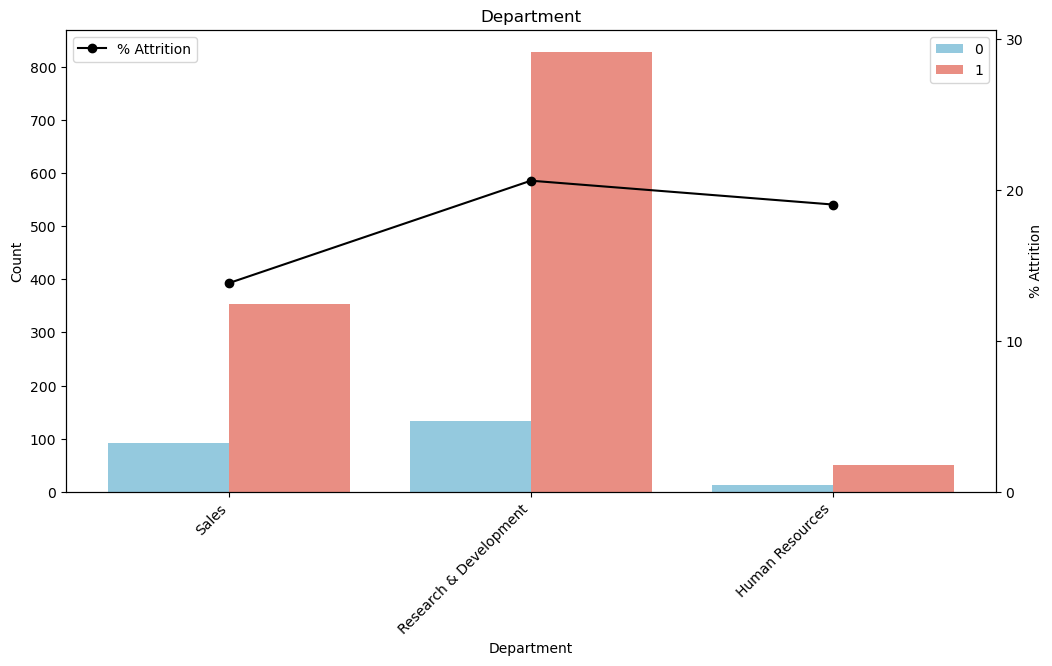

In [94]:
plot_countplot_with_percentage('Department',True)

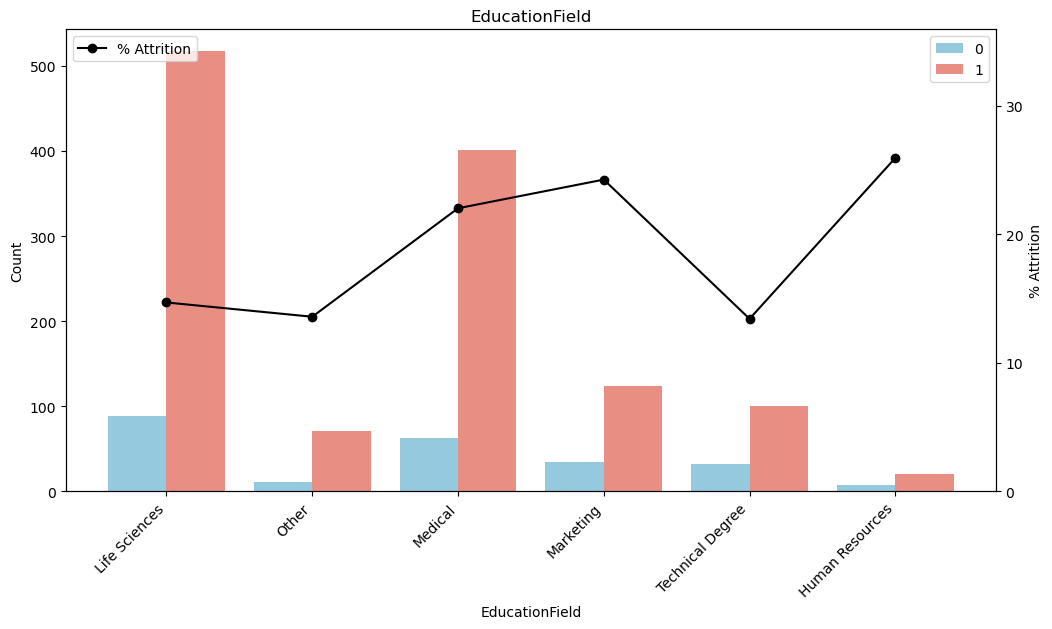

In [95]:
plot_countplot_with_percentage('EducationField',True)

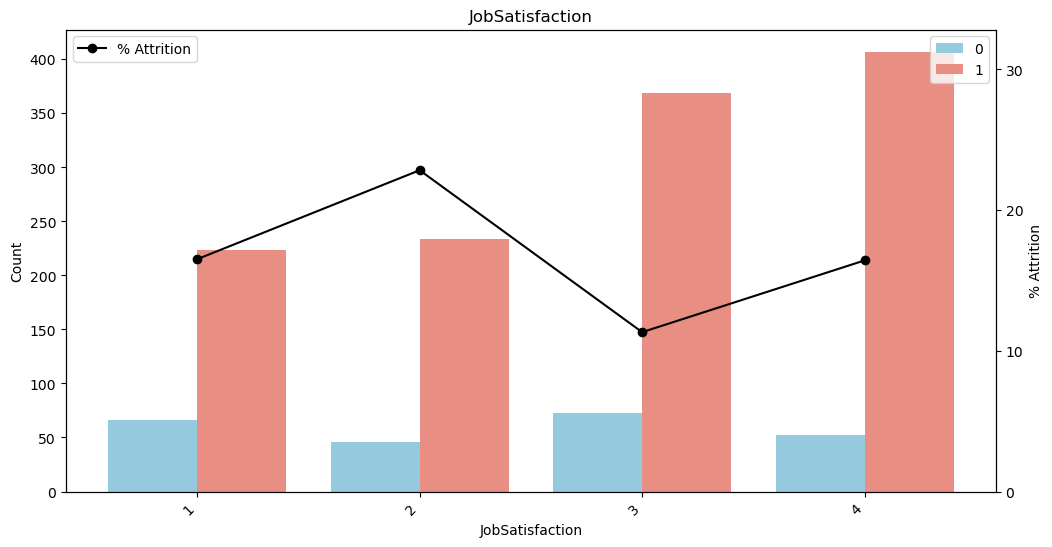

In [96]:
plot_countplot_with_percentage('JobSatisfaction',True)

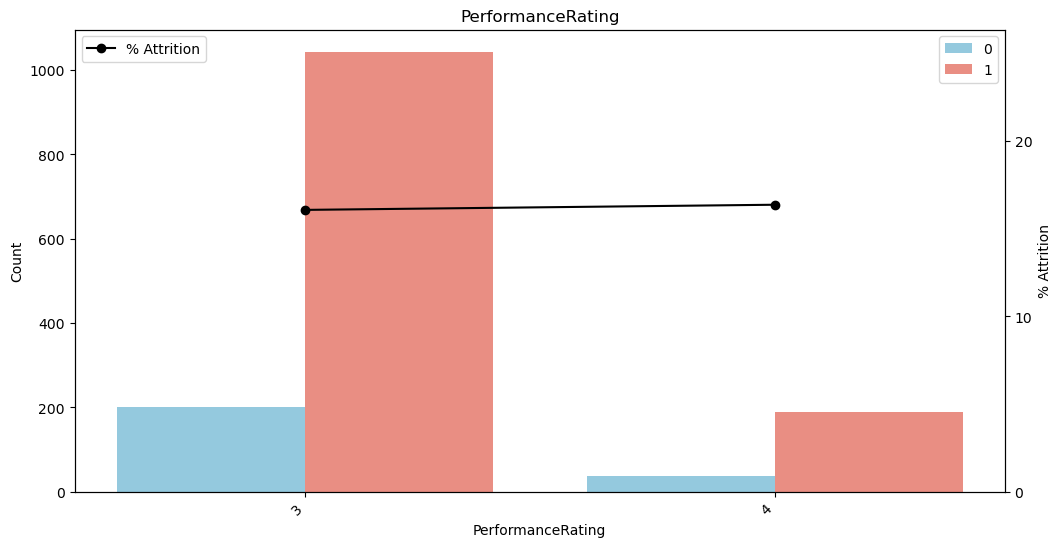

In [97]:
plot_countplot_with_percentage('PerformanceRating',True)

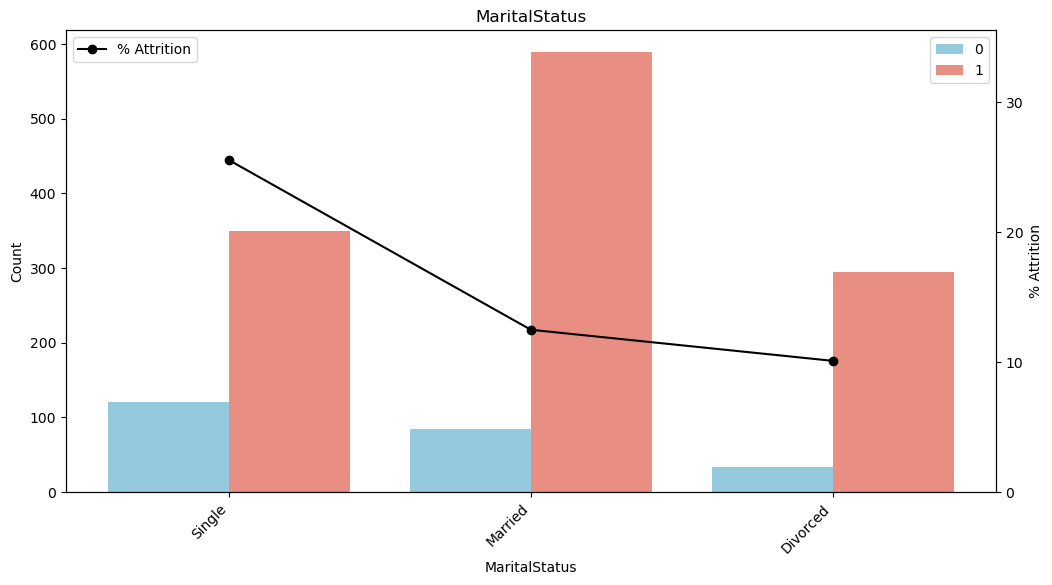

In [98]:
plot_countplot_with_percentage('MaritalStatus',True)

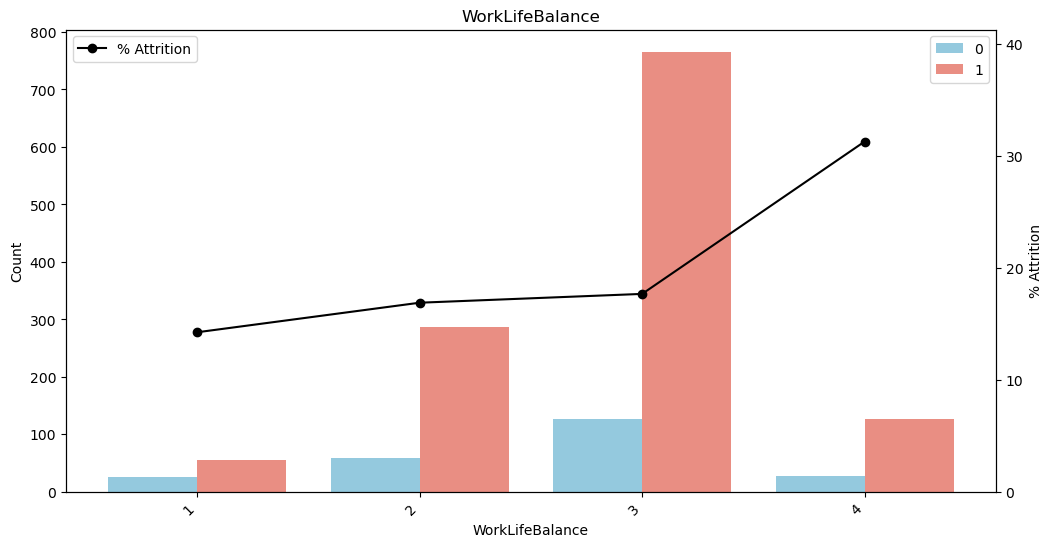

In [99]:
plot_countplot_with_percentage('WorkLifeBalance',True)

### Observation:¶
- We can see that employee with best work life balance are more likely to leave the company. Although employee with a good work life balance are greater in number and attrition amongst them is around 20%
-Since, less employees claim to have best worklife balance, we can't be sure of attrition%

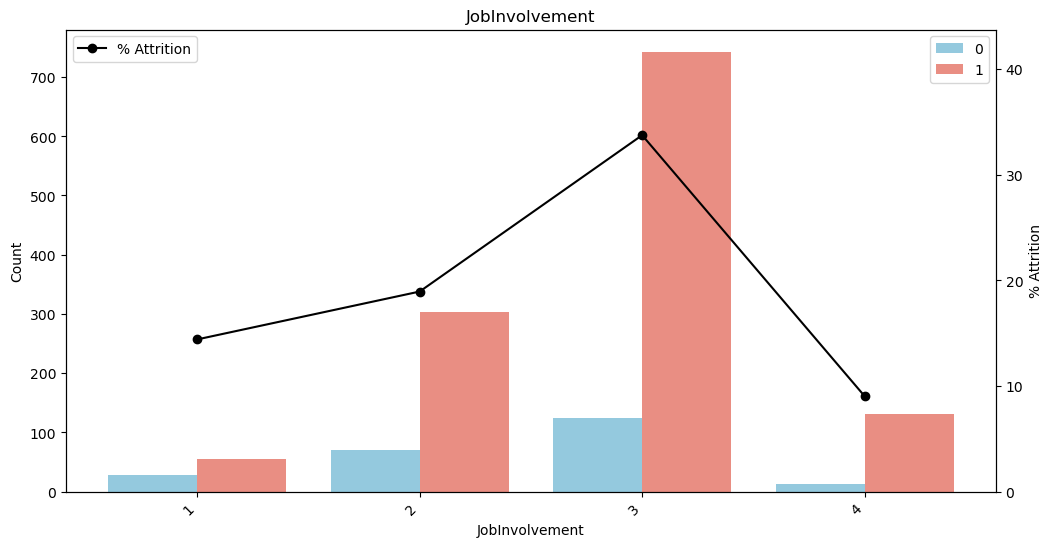

In [100]:
plot_countplot_with_percentage('JobInvolvement',True)

### Summary of Exploratory Data Analysis (EDA):
* Income and Attrition: Monthly income is bimodally distributed, with most employees earning between 2000-6000 dollars. High-income employees have a lower attrition rate, but there are exceptions where employees with high income also leave.

* Age and Attrition: Age is normally distributed, with younger employees showing higher attrition. As employees grow older, attrition tends to decrease, possibly due to seeking stability in later stages of their careers.

* Distance and Attrition: Employees living closer to the company have lower attrition rates, while those farther away are more likely to leave.

* Prior Work Experience: Majority of employees have worked in only one company before joining IBM. Employees with more than 4 prior work experiences tend to leave the company.

* Hike and Attrition: Employees with lower hikes or more than 22% hike tend to leave the company, indicating a preference for competitive offers.

* Tenure and Attrition: Employees in the early part of their careers are more prone to attrition. Those who have worked for more than 4 years are likely to stay, while attrition peaks for employees with more than 23 or 30 years of tenure.

* Promotion and Attrition: Employees who have not been promoted for more than 5 years tend to leave the company.

* Department and Attrition: Employees in R&D department have higher attrition, while Marketing and HR have relatively high attrition rates too.

* Job Satisfaction: Low job satisfaction leads to higher attrition rates.

* Marital Status and Attrition: Single employees show higher attrition rates.

* Work-Life Balance: Employees rating themselves with the best work-life balance tend to have higher attrition, although their numbers are lower, making it less conclusive.

* Job Involvement: Employees rating themselves with high job involvement tend to work overtime and have higher attrition rates.

* Overall, younger employees, those with higher job involvement, lower job satisfaction, and those living far from the company tend to have higher attrition rates. Additionally, the department, prior work experiences, and promotions play a role in determining attrition trends

### Data Preprocessing

#### Label Encoding

In [101]:
le = LabelEncoder()
for i in (categorical_features):
    if type(hr_attrition[i][0]) == str:
        hr_attrition[i] = le.fit_transform(hr_attrition[i])

### Correlation Analysis

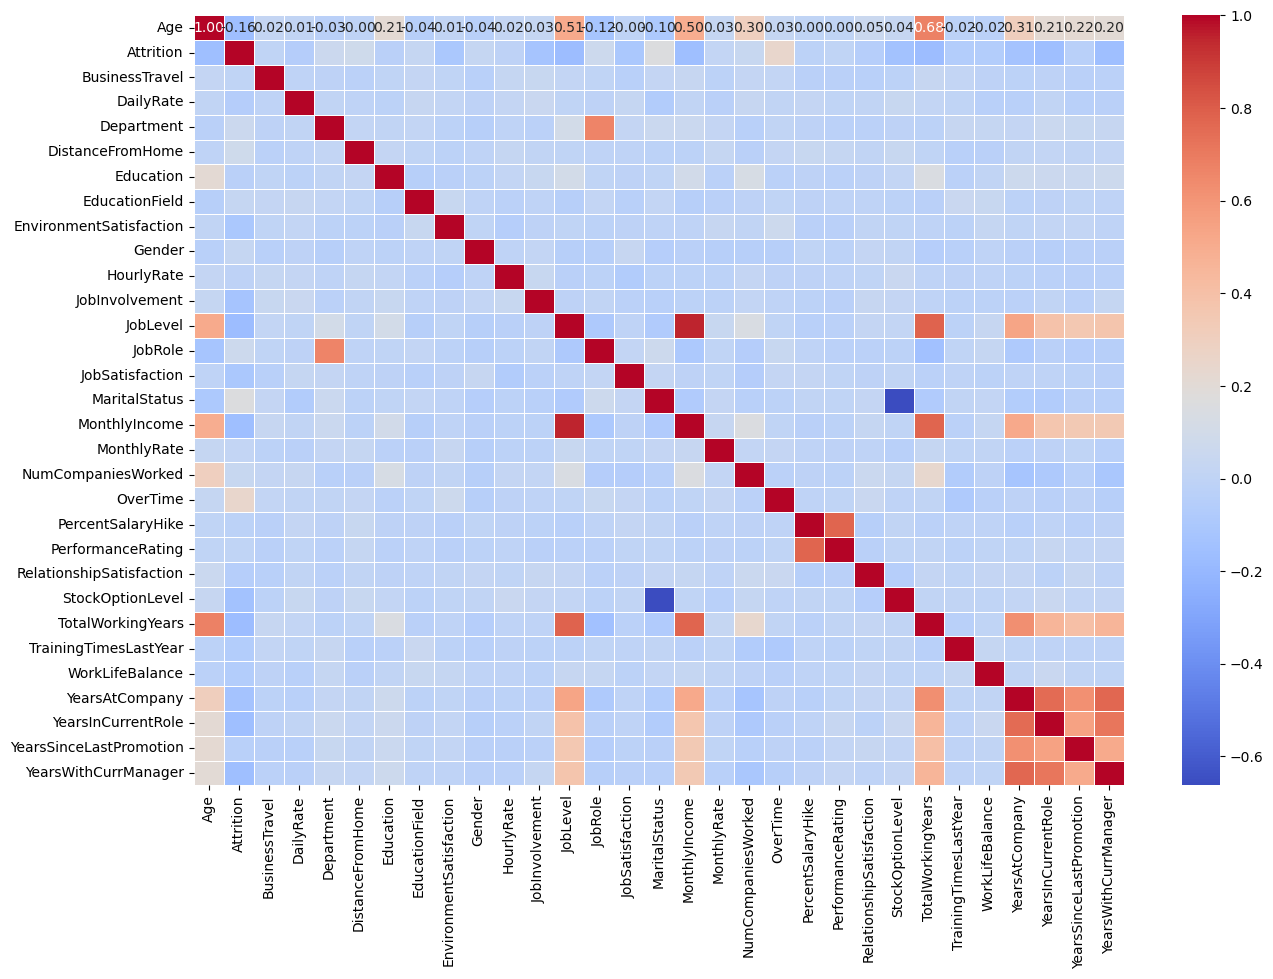

In [102]:

fig = plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
sns.heatmap(data=hr_attrition.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.show()



### Targets and Features

In [103]:
X = hr_attrition.drop(columns=['Attrition'],axis=1)
y = hr_attrition['Attrition']
protected_character = hr_attrition[['Age', 'Gender']]

### Resampling dataset to handle imbalance

In [104]:
smote_tomek = SMOTETomek(random_state=48)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

SMOTETomek is used to combine the strengths of SMOTE and Tomek links. It first applies SMOTE to oversample the minority class and then uses Tomek links to clean the resulting dataset by removing overlapping examples that can potentially lead to misclassifications. The combination of these two techniques helps to improve the overall performance and generalization of classifiers on imbalanced datasets. SMOTETomek can be particularly effective in scenarios where there is a significant class imbalance, and the decision boundary between classes is not well-defined

### Splitting Data into training and testing sets, stratified by the protected characteristics

In [105]:
# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Printing the shapes of the split datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1857, 30)
Testing data shape: (465, 30)


In [106]:
# Combine resampled features and target variable into one DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Attrition')], axis=1)

# Calculate correlation matrix
correlation_matrix = resampled_data.corr()

# Correlation of features with the target variable ('Attrition')
correlation_with_target = correlation_matrix['Attrition'].drop('Attrition')  # Drop target variable itself

# Display correlation of features with the target variable
print("Correlation of Features with Target variable ('Attrition'):")
print(correlation_with_target)

Correlation of Features with Target variable ('Attrition'):
Age                        -0.279408
BusinessTravel             -0.133788
DailyRate                  -0.079604
Department                 -0.138276
DistanceFromHome            0.089107
Education                  -0.190333
EducationField             -0.085265
EnvironmentSatisfaction    -0.283456
Gender                     -0.163674
HourlyRate                 -0.011557
JobInvolvement             -0.345424
JobLevel                   -0.322370
JobRole                     0.029295
JobSatisfaction            -0.289977
MaritalStatus               0.061036
MonthlyIncome              -0.275742
MonthlyRate                 0.010720
NumCompaniesWorked         -0.006512
OverTime                    0.107843
PercentSalaryHike          -0.036659
PerformanceRating          -0.155043
RelationshipSatisfaction   -0.223893
StockOptionLevel           -0.318309
TotalWorkingYears          -0.302289
TrainingTimesLastYear      -0.213157
WorkLifeBalance

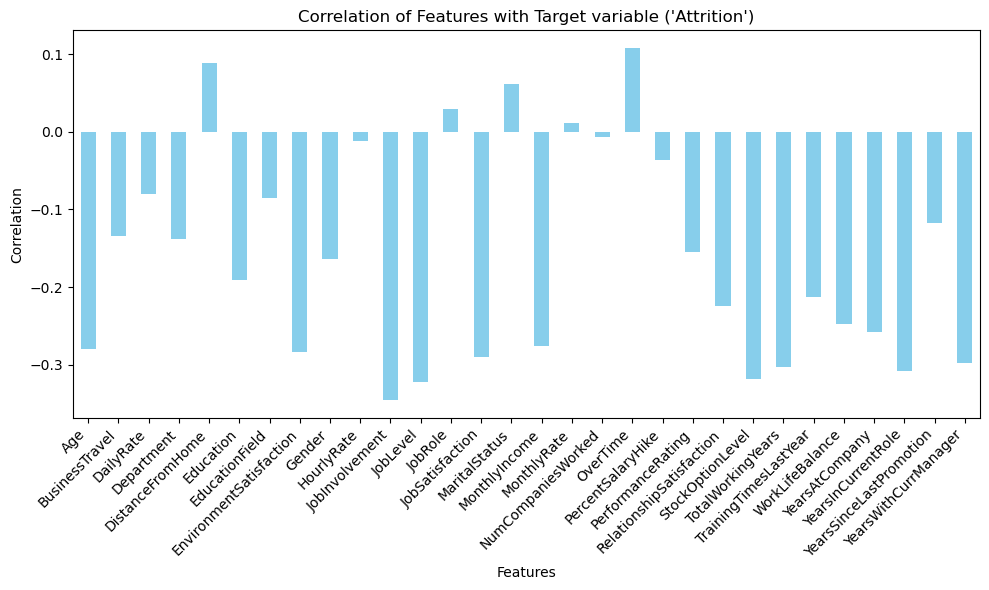

In [107]:
# Plot correlation of features with the target variable
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Target variable ('Attrition')")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Dropping irrelevant Column

In [130]:
# Assuming X_resampled is your resampled feature matrix
X_resampled_feature_selected = X_resampled.drop(columns=['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                                        'YearsSinceLastPromotion', 'DistanceFromHome', 'DailyRate',
                                                        'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                                        'BusinessTravel', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime'])

# Splitting the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled_feature_selected, y_resampled, test_size=0.2, random_state=42)

# Printing the shapes of the split datasets
print("Training data shape:", X_train_resampled.shape)
print("Testing data shape:", X_test_resampled.shape)


Training data shape: (1857, 16)
Testing data shape: (465, 16)


### Feature Scaling
norm_features are those features which are not normally distributed. We will use Normalization to scale these features
std_features are those features which are normally distributed. We will use Standardization to scale these features

In [131]:
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [132]:
# Fit and transform the training data
X_train_resampled_scaled = X_train_resampled.copy()
X_train_resampled_scaled = minmax_scaler.fit_transform(X_train_resampled_scaled)
X_train_resampled_scaled = std_scaler.fit_transform(X_train_resampled_scaled)



In [133]:
# Transform the testing data using the fitted scalers from the training data
X_test_resampled_scaled = X_test_resampled.copy()
X_test_resampled_scaled = minmax_scaler.transform(X_test_resampled_scaled)
X_test_resampled_scaled = std_scaler.transform(X_test_resampled_scaled)

### Modelling

For the employee attrition problem, we have selected a diverse set of classifiers to explore different modeling approaches and capture various aspects of the data. The RandomForestClassifier and XGBClassifier are powerful ensemble methods that can handle non-linearity and complex relationships, while the MLPClassifier brings in the capabilities of neural networks to capture intricate patterns. The GaussianProcessClassifier offers probabilistic modeling with uncertainty estimation, which can be useful for reliable predictions. Additionally, we have included the DecisionTreeClassifier, a simple and interpretable model for feature analysis. The KNNClassifier is chosen for its simplicity and effectiveness in dealing with data points in proximity, while the SVC (Support Vector Classifier) is known for its ability to find optimal hyperplanes to separate classes in high-dimensional spaces. Lastly, the LGBMClassifier stands out for its efficiency in dealing with large datasets and imbalanced classes, and the AdaBoostClassifier focuses on iteratively improving performance by giving more emphasis to misclassified samples.
It's worth mentioning that we have experimented with both scaled and unscaled data for different models, as scaling may impact the performance of certain algorithms.
We will employ various metrics such as accuracy, precision, recall, and F1-score to gauge the overall classification performance. The ROC curve and Area Under the Curve (AUC) will be used to understand the trade-off between true positive and false positive rates. Additionally, confusion matrices will provide insights into the true negative, false positive, false negative, and true positive rates. These evaluation measures will help us compare and select the most suitable model for the task at hand

In [115]:
def plot_feature_importance(classifier, x_train_resampled):
    if hasattr(classifier, 'feature_importances_'):
        if isinstance(x_train_resampled, pd.Index):
            x_train_resampled = x_train_resampled.to_frame()
        if isinstance(x_train_resampled, pd.DataFrame):
            feature_importances = classifier.feature_importances_
            features = x_train_resampled.columns

            sorted_idx = np.argsort(feature_importances)[::-1]

            plt.figure(figsize=(10, 6))
            plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
            plt.xticks(range(len(feature_importances)), np.array(features)[sorted_idx], rotation=90)
            plt.xlabel('Feature')
            plt.ylabel('Importance')
            plt.title('Feature Importance')
            plt.show()
        else:
            print("x_train_resampled is not a DataFrame.")
    else:
        print("Classifier does not have feature importances.")



def model(name, classifier, x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled):
    classifier.fit(x_train_resampled, y_train_resampled)
    prediction = classifier.predict(x_test_resampled)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cross_val_auc = cross_val_score(classifier, x_train_resampled, y_train_resampled, cv=cv, scoring='roc_auc').mean()
    roc_auc = roc_auc_score(y_test_resampled, prediction)

    plot_roc_curve(classifier, x_test_resampled, y_test_resampled)

    plot_feature_importance(classifier, x_train_resampled)

    print("\nClassification Report:\n")
    print(classification_report(y_test_resampled, prediction))

    cm = confusion_matrix(y_test_resampled, prediction)
    tn, fp, fn, tp = cm.ravel()
    tp_rate = round((tp / (tp + fn))*100,2)
    fp_rate = round((fp / (fp + tn))*100,2)
    tn_rate = round((tn / (tn + fp))*100,2)
    fn_rate = round((fn / (fn + tp))*100,2)
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [tn,fp,fn,tp]
    percentages = [tn_rate,fp_rate,fn_rate,tp_rate]
    labels = [f'{v1}\n{v2}\n{v3}%' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    plt.show()
   
    result_list = calculate_metrics(y_test_resampled, prediction, cm)
    return result_list


def plot_roc_curve(model, X_test_resampled, y_test_resampled):
    # Predict probabilities for positive class
    y_score = model.predict_proba(X_test_resampled)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_resampled, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

def calculate_metrics(y_true, y_pred, cm):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Add any additional metrics you need
    # Calculate true positive rate, false positive rate, etc.

    return accuracy, precision, recall, f1

In [134]:
def calculate_metrics(y_true, y_pred, cm):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Add any additional metrics you need
    # Calculate true positive rate, false positive rate, etc.

    return accuracy, precision, recall, f1

def plot_roc_curve(model, X_test_resampled, y_test_resampled):
    # Predict probabilities for positive class
    y_score = model.predict_proba(X_test_resampled)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_resampled, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

def plot_feature_importance(classifier, x_train_resampled):
    if hasattr(classifier, 'feature_importances_'):
        if isinstance(x_train_resampled, pd.Index):
            x_train_resampled = x_train_resampled.to_frame()
        if isinstance(x_train_resampled, pd.DataFrame):
            feature_importances = classifier.feature_importances_
            features = x_train_resampled.columns

            sorted_idx = np.argsort(feature_importances)[::-1]

            plt.figure(figsize=(10, 6))
            plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
            plt.xticks(range(len(feature_importances)), np.array(features)[sorted_idx], rotation=90)
            plt.xlabel('Feature')
            plt.ylabel('Importance')
            plt.title('Feature Importance')
            plt.show()
        else:
            print("x_train_resampled is not a DataFrame.")
    else:
        print("Classifier does not have feature importances.")


def model(name, classifier, x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled):
    classifier.fit(x_train_resampled, y_train_resampled)
    prediction = classifier.predict(x_test_resampled)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cross_val_auc = cross_val_score(classifier, x_train_resampled, y_train_resampled, cv=cv, scoring='roc_auc').mean()
    roc_auc = roc_auc_score(y_test_resampled, prediction)

    plot_roc_curve(classifier, x_test_resampled, y_test_resampled)

    plot_feature_importance(classifier, x_train_resampled)

    print("\nClassification Report:\n")
    print(classification_report(y_test_resampled, prediction))

    cm = confusion_matrix(y_test_resampled, prediction)
    tn, fp, fn, tp = cm.ravel()
    tp_rate = round((tp / (tp + fn))*100,2)
    fp_rate = round((fp / (fp + tn))*100,2)
    tn_rate = round((tn / (tn + fp))*100,2)
    fn_rate = round((fn / (fn + tp))*100,2)
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [tn,fp,fn,tp]
    percentages = [tn_rate,fp_rate,fn_rate,tp_rate]
    labels = [f'{v1}\n{v2}\n{v3}%' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    plt.show()
   
    result_list = calculate_metrics(y_test_resampled, prediction, cm)
    return result_list


In [135]:
classifiers = [
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42),
    MLPClassifier(random_state=42),
    GaussianProcessClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000),
    AdaBoostClassifier(random_state=48),
    KNeighborsClassifier(),
    SVC(random_state=42, probability=True)
]

classifier_names = [
    'RandomForest',
    'XGBoost',
    'MLPClassifier',
    'GaussianProcess',
    'DecisionTree',
    'LGBMClassifier',
    'AdaBoostClassifier',
    'KNN',
    'SVC'
]

# Create a dictionary to store the results
results_dict = {}


### DecisionTree Classfier

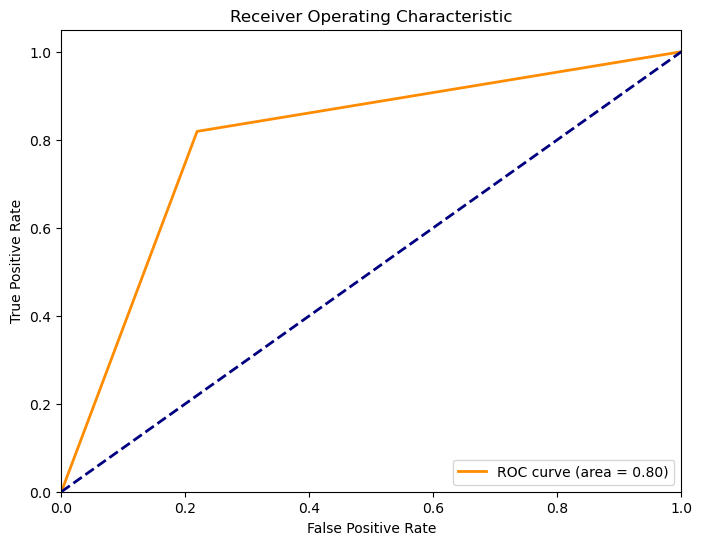

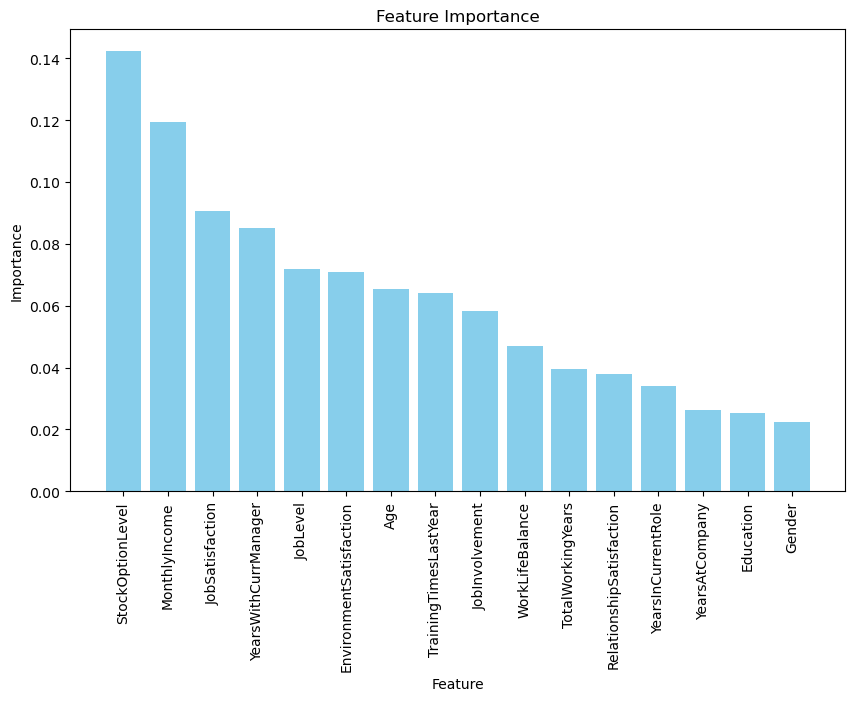


Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       233
           1       0.79      0.82      0.80       232

    accuracy                           0.80       465
   macro avg       0.80      0.80      0.80       465
weighted avg       0.80      0.80      0.80       465



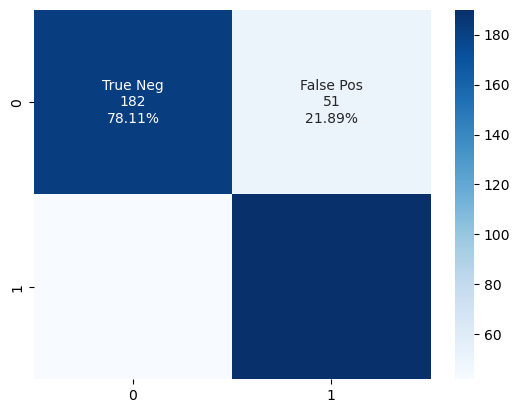

In [136]:
classifier_results = model('DecisionTree', DecisionTreeClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['DecisionTree'] = classifier_results


### RandomForest Classifier

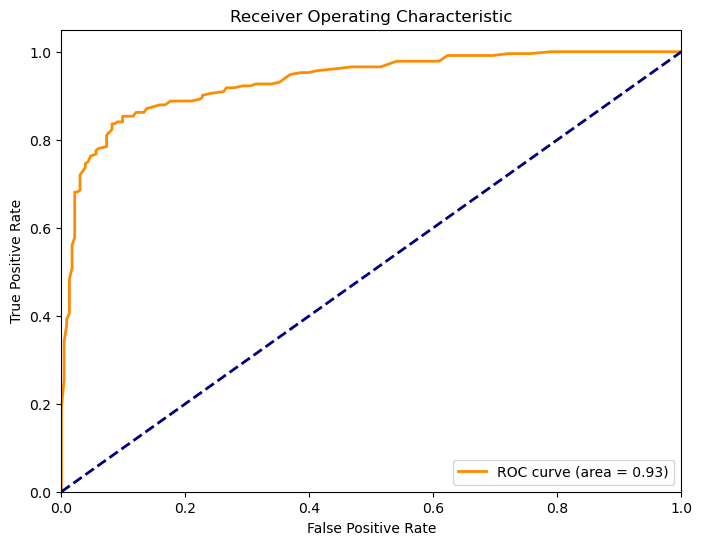

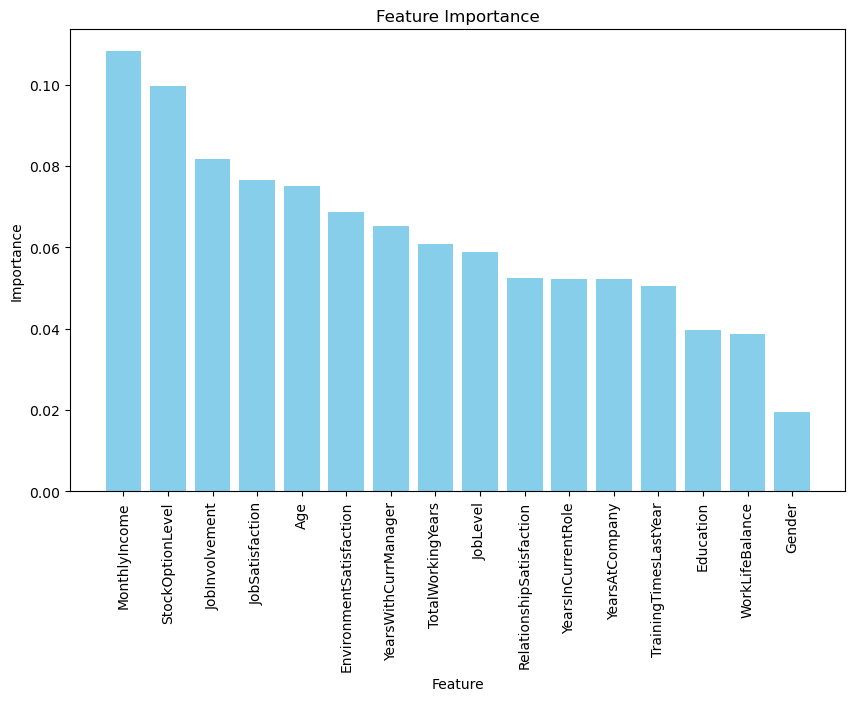


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       233
           1       0.90      0.85      0.87       232

    accuracy                           0.88       465
   macro avg       0.88      0.88      0.88       465
weighted avg       0.88      0.88      0.88       465



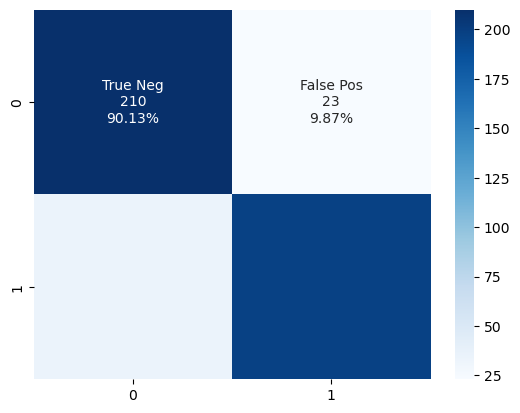

In [137]:
classifier_results = model('RandomForest',RandomForestClassifier(random_state=42),  X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['RandomForest'] = classifier_results

### XGBoost Classifier

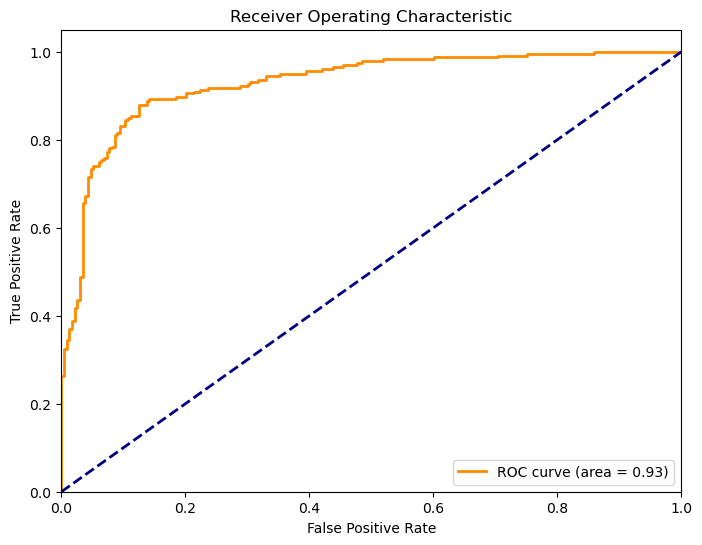

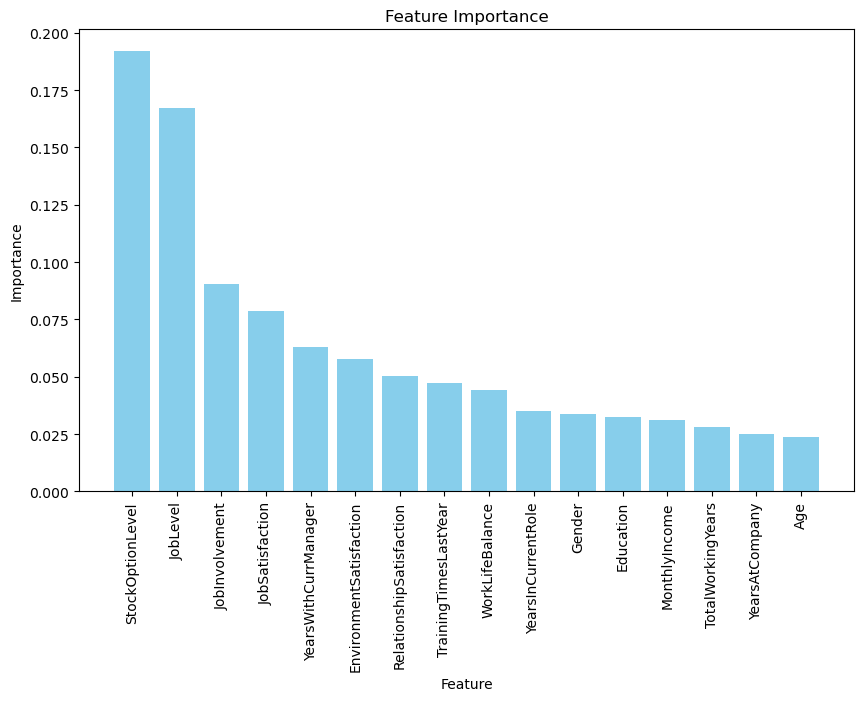


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       233
           1       0.88      0.85      0.86       232

    accuracy                           0.87       465
   macro avg       0.87      0.87      0.87       465
weighted avg       0.87      0.87      0.87       465



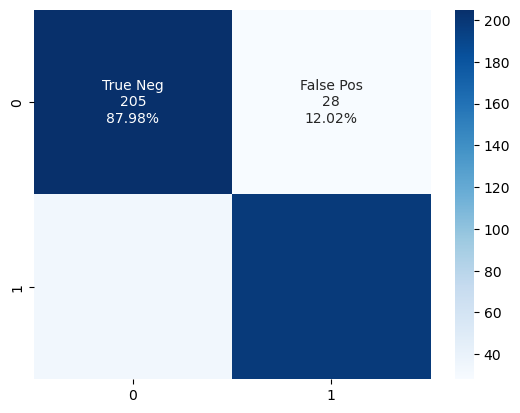

In [138]:
classifier_results = model('XGBoost',XGBClassifier(random_state=42),  X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['XGBoost'] = classifier_results

### GaussianProcess Classifier

In [ ]:
classifier_results = model('GaussianProcess', GaussianProcessClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['GaussianProcess'] = classifier_results

### MultiLayerPerceptron Classifier

In [ ]:
# Fit and evaluate the MLPClassifier model using resampled data
classifier_results = model('MLPClassifier', MLPClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['MLPClassifier'] = classifier_results


### LGBM Classifier

In [ ]:
classifier_results = model('LGBMClassifier', LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['LGBMClassifier'] = classifier_results

### KNN Classifier

In [ ]:
classifier_results = model('KNN', KNeighborsClassifier(), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['KNN'] = classifier_results

### Support Vector Classifier

In [ ]:
classifier_results = model('SVC', SVC(probability=True), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['SVC'] = classifier_results

### AdaBoost Classifier

In [ ]:
classifier_results = model('AdaBoostClassifier', AdaBoostClassifier(random_state=48), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['AdaBoostClassifier'] = classifier_results


In [ ]:
for key, val in results_dict.items():
    results_dict[key] = [round(i * 100, 2) for i in val]

results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TP%', 'FP%', 'TN%', 'FN%'])
results_df = results_df.sort_values(by=['Accuracy', 'F1-Score', 'Precision', 'Recall'], ascending=False)
results_df


### Hyperparameter Tunning

In [ ]:
def print_classification_report(classifier, X, y):
    y_pred = classifier.predict(X)
    report = classification_report(y, y_pred)
    print("Classification Report:")
    print(report)

def hyperparameter_tuning_and_evaluation(model, X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, param_grid):
    # Perform Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    return best_params


In [ ]:
tuned_results = {}


### Random Forest Classifier

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_params = hyperparameter_tuning_and_evaluation(RandomForestClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, param_grid)
classifier_results = model('RandomForest', RandomForestClassifier(**best_params), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
tuned_results['RandomForest'] = classifier_results

print("Best Hyperparameters for RandomForest:", best_params)


### XGBoost

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

best_params = hyperparameter_tuning_and_evaluation(XGBClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, param_grid)
classifier_results = model('XGBoost', XGBClassifier(**best_params), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
tuned_results['XGBoost'] = classifier_results

print("Best Hyperparameters for XGBoost:", best_params)


### Correlation of Features with Target

In [204]:
feautre_sel_hr_attrition = X_train.copy(deep=True)
feautre_sel_hrdf['Attrition'] = y_train

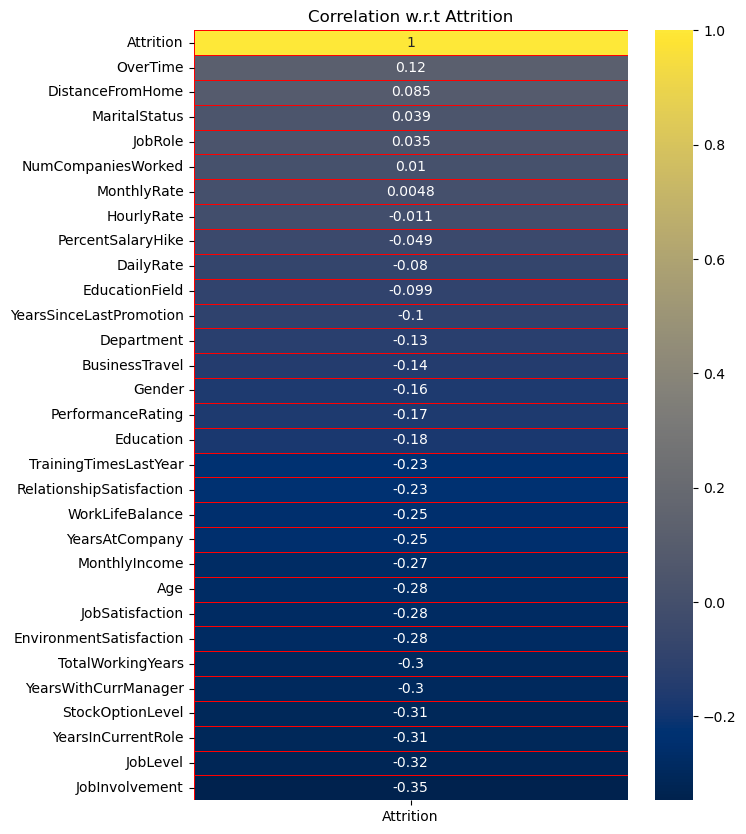

In [206]:
corr = feautre_sel_hr_attrition.corrwith(feautre_sel_hr_attrition['Attrition']).sort_values(ascending = False).to_frame()
corr.columns = ['Attrition']
plt.subplots(figsize = (7,10))
sns.heatmap(corr,annot = True,cmap='cividis',linewidths = 0.4,linecolor = 'red');
plt.title('Correlation w.r.t Attrition');

### Observation:
We can see that none of the features correlate with attrition label

### Feature Selection

### ChiSqaure Test to select Categorical Features

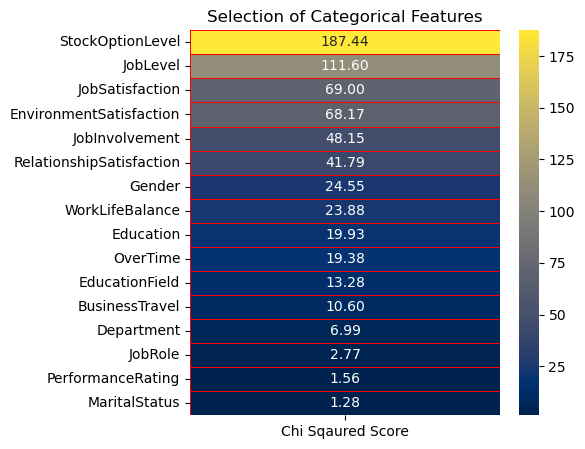

In [207]:
features = X_train.loc[:,categorical_features[1:]]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Sqaured Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Sqaured Score'),annot = True,cmap = 'cividis',linewidths = 0.4,linecolor = 'red',fmt = '.2f');
plt.title('Selection of Categorical Features');

### Observation:
We can see that Education, OverTime, EducationField, BusinessTravel, Department, JobRole, PerformanceRating, MaritalStatus have the least chi square score. They dont have significant impact on predicting the target

### ANOVA Test to select Discrete Features

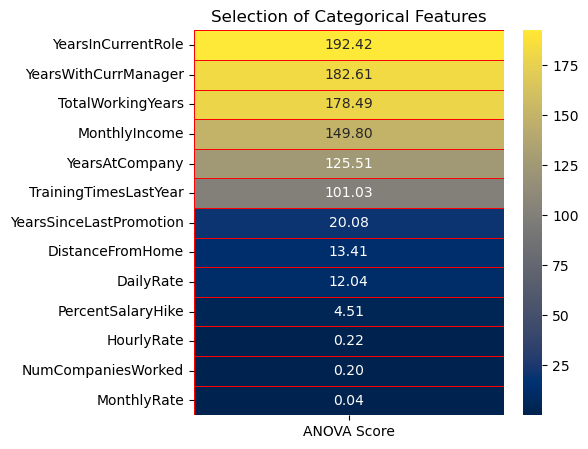

In [208]:
features = X_train.loc[:,discrete_features[1:]]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'cividis',linewidths = 0.4,linecolor = 'red',fmt = '.2f');
plt.title('Selection of Categorical Features');

### Observation:
We can see that YearsSinceLastPromotion, DistanceFromHome, DailyRate, PercentSalaryHike, HourlyRate, NumCompaniesWorked, MonthlyRate have the least ANOVA score. They dont have significant impact on predicting the target

### We will drop irrelevant features

In [ ]:
X_train = X_train.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus','NumCompaniesWorked','OverTime'])

X_test = X_test.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus' ,'NumCompaniesWorked','OverTime'])